Transition Probability Matrix:
           Sunny    Cloudy     Rainy
Sunny   0.222222  0.333333  0.444444
Cloudy  0.666667  0.166667  0.166667
Rainy   0.500000  0.500000  0.000000
Predicted weather for 30 days starting from 'Sunny':
['Sunny', 'Rainy', 'Cloudy', 'Cloudy', 'Sunny', 'Cloudy', 'Sunny', 'Cloudy', 'Sunny', 'Cloudy', 'Sunny', 'Cloudy', 'Sunny', 'Rainy', 'Cloudy', 'Sunny', 'Sunny', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Cloudy', 'Sunny', 'Cloudy', 'Sunny', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Rainy']


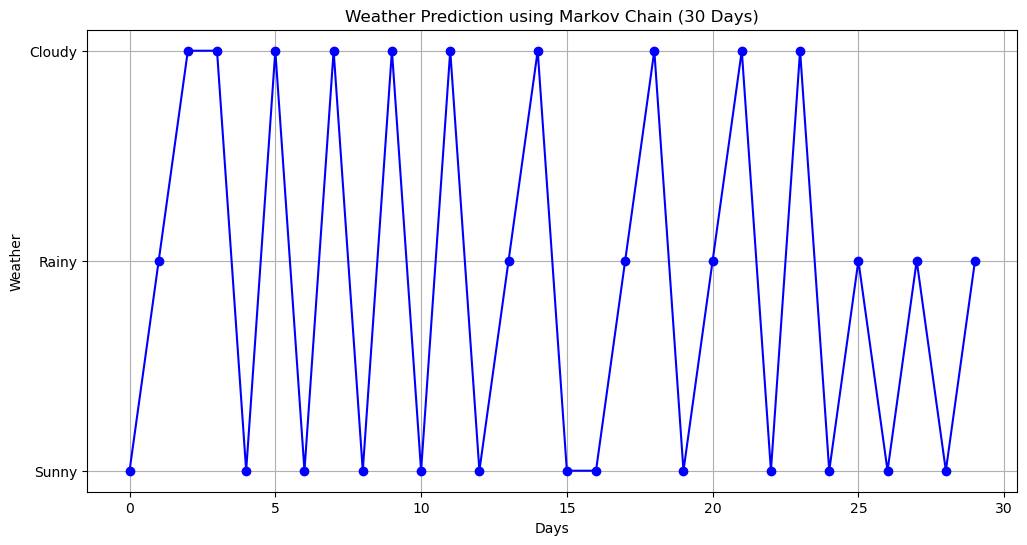

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load weather data (replace with the actual path to your dataset)
data = {
    'Day': list(range(1, 21)),
    'Weather': ['Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Cloudy', 
                'Sunny', 'Cloudy', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Cloudy', 'Cloudy', 'Sunny', 'Rainy']
}
weather_df = pd.DataFrame(data)

# Define the possible weather states
states = ['Sunny', 'Cloudy', 'Rainy']

# Create a transition count matrix
transition_counts = pd.DataFrame(0, index=states, columns=states)

# Calculate transitions from the historical data
for i in range(len(weather_df) - 1):
    current_state = weather_df.loc[i, 'Weather']
    next_state = weather_df.loc[i + 1, 'Weather']
    transition_counts.loc[current_state, next_state] += 1

# Convert counts to probabilities (normalize each row)
transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0)
print("Transition Probability Matrix:")
print(transition_matrix)

# Function to simulate weather based on the learned transition matrix
def simulate_weather(transition_matrix, initial_state, num_days):
    current_state = initial_state
    weather_sequence = [current_state]
    
    for _ in range(num_days - 1):
        next_state = np.random.choice(states, p=transition_matrix.loc[current_state].values)
        weather_sequence.append(next_state)
        current_state = next_state
    
    return weather_sequence

# Simulate weather for 30 days starting from "Sunny"
num_days = 30
initial_state = 'Sunny'
predicted_weather = simulate_weather(transition_matrix, initial_state, num_days)

# Display the predicted weather sequence
print(f"Predicted weather for {num_days} days starting from '{initial_state}':")
print(predicted_weather)

# Visualize the weather prediction as a time series
plt.figure(figsize=(12, 6))
plt.plot(predicted_weather, marker='o', linestyle='-', color='blue')
plt.title('Weather Prediction using Markov Chain (30 Days)')
plt.xlabel('Days')
plt.ylabel('Weather')
plt.grid(True)
plt.show()
